# 1 a)

$y_i = HHTHHTTH$

$\theta = P(y_i = H)$ from the data

Also, $1 - \theta = P(y_i = T)$ 

$\log(L_{(y_i)} | \theta) = \log \prod_{i=1}^n p_i = \sum_{i=1} ^ n \log p_i = 5 \log \theta + 3 \log (1 - \theta)$

# 1 b)

$\theta^* = \arg \max [5 \log \theta + 3 \log (1 - \theta)]$ 

$\frac{d \log L_{(y_i)} | \theta}{d \theta} = \frac{5}{\theta} + \frac{3}{1 - \theta} \cdot (-1) = 0$

$\frac{5}{\theta} = \frac{3}{1 - \theta}$

$5 \cdot (1 - \theta) = 3 \cdot \theta$

$\theta^* = \frac{5}{8}$

# 1 d)

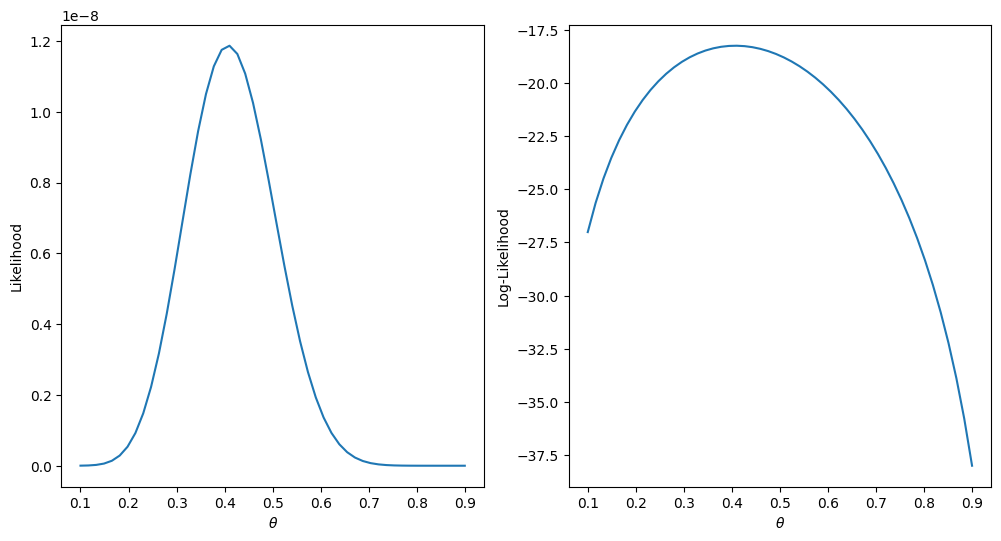

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def likelihood(seq, theta):
    l = 1
    for term in sequence:
        l *= theta ** term if term == 1 else (1 - theta) ** (1 - term)
    return l

def log_likelihood(seq, theta):
    l = 0
    for term in seq:
        l += term * np.log(theta) if term == 1 else (1 - term) * np.log(1 - theta)
    return l

sequence = []

with open('Input.txt', 'rt', encoding='utf-8') as fp:
    while line := fp.readline():
         sequence.append(float(line))

sequence = np.array(sequence)


thetas = np.linspace(0.1,0.9,50)
Ls = np.array(list(map(lambda theta: likelihood(sequence, theta = theta), thetas)))
ls = np.array(list(map(lambda theta: log_likelihood(sequence, theta = theta), thetas)))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(thetas, Ls)
axs[0].set_xlabel(r'$\theta$')
axs[0].set_ylabel('Likelihood')


axs[1].plot(thetas, ls)
axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel('Log-Likelihood')
plt.show()

# 2 a)

$\theta_j$ - ?

For example, probability $p_{00}$ to stay in the current 0 state: $0 \rightarrow 0$ could be equal to $\theta_1$

Also, probability $p_{11}$ to stay in the current 1 state: $1 \rightarrow 1$ could be equal to $\theta_2$

# 2 b)

$p_{00} = \theta_1$

$p_{01} = 1 - \theta_1$

$p_{11} = \theta_2$

$p_{10} = 1 - \theta_2$

$L = \theta_1^6 \,(1 - \theta_1)^2 \, \theta_2^3 \, (1 - \theta_2)^2$

# 2 c)

$l = \log L = 6 \log \theta_1 + 2 \log (1 - \theta_1) + 3 \log \theta_2 + 2 \log (1 - \theta_2) $

$\frac{dl}{d\theta_1} = \frac{6}{\theta_1} - \frac{2}{1 - \theta_1} = 0$, where $\theta_1^* = \frac{3}{4}$

$\frac{dl}{d\theta_2} = \frac{3}{\theta_2} - \frac{2}{1 - \theta_1} = 0$, where $\theta_2^* = \frac{3}{5}$

# 2 d)

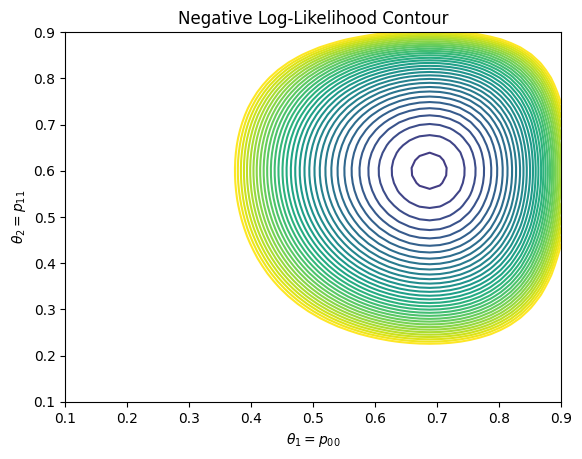

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sequence = []
with open('Input.txt', 'rt', encoding='utf-8') as fp:
    for line in fp:
        sequence.append(int(line.strip()))
sequence = np.array(sequence)

def neg_log_likelihood(seq, theta1, theta2):
    mapping = {
        (0, 0): theta1,
        (0, 1): 1 - theta1,
        (1, 0): 1 - theta2,
        (1, 1): theta2
    }
    eps = 1e-12
    nll = 0
    for i in range(len(seq) - 1):
        transition = (seq[i], seq[i+1])
        nll -= np.log(mapping[transition] + eps)
    return nll

theta_vals = np.linspace(0.1, 0.9, 50)
Z = np.zeros((len(theta_vals), len(theta_vals)))

for i, t1 in enumerate(theta_vals):
    for j, t2 in enumerate(theta_vals):
        Z[j, i] = neg_log_likelihood(sequence, t1, t2)

X, Y = np.meshgrid(theta_vals, theta_vals)
levels = np.arange(16, 20, 0.1)
plt.contour(X, Y, Z, levels=levels)
plt.xlabel(r'$\theta_1 = p_{00}$')
plt.ylabel(r'$\theta_2 = p_{11}$')
plt.title('Negative Log-Likelihood Contour')
plt.show()